# Import and Clean Data

In [83]:
import csv
import pkgutil
import encodings
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

text = b'\x96'
for enc in all_encodings():
    try:
        msg = text.decode(enc)
    except Exception:
        continue
    if msg == 'ñ':
        print('Decoding {t} with {enc} is {m}'.format(t=text, enc=enc, m=msg))


Decoding b'\x96' with mac_farsi is ñ
Decoding b'\x96' with mac_arabic is ñ
Decoding b'\x96' with mac_iceland is ñ
Decoding b'\x96' with mac_turkish is ñ
Decoding b'\x96' with mac_romanian is ñ
Decoding b'\x96' with mac_roman is ñ
Decoding b'\x96' with mac_croatian is ñ


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: unicode_internal codec has been deprecated


In [84]:
df = pd.read_csv('Texas Last Statement - CSV.csv', encoding='latin1')

In [85]:
a = df[df['LastStatement'].str.contains("innocent|didn't do|did not do|truth|not guilty|didn't kill|did not kill|did not murder|never killed|innocence")]

In [86]:
a['Guilty'] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df['Guilty'] = 1

In [140]:
frames = [df, a]
#result = pd.concat(frames)
#result.drop_duplicates().reset_index(drop=True)

# Visualize Class Imbalance

Guilty
0     68
1    545
Name: Guilty, dtype: int64


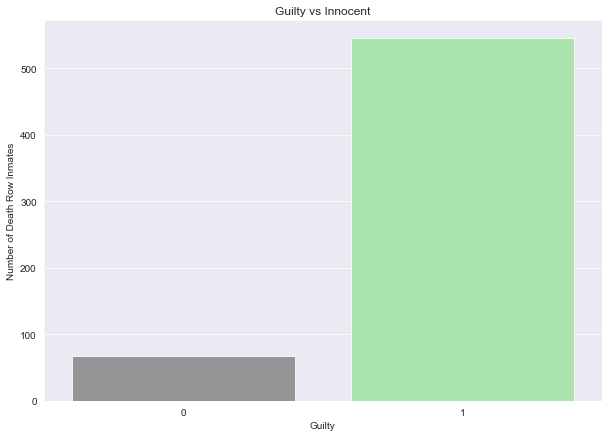

In [89]:
print(result.groupby(['Guilty']).Guilty.count())
sns.set_style('darkgrid')
plt.figure(figsize = (10,7))
sns.countplot(result['Guilty'], alpha =.8, palette= ['grey','lightgreen'])
plt.title('Guilty vs Innocent')
plt.ylabel('Number of Death Row Inmates')
plt.show()

# Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [118]:
new_result = result.drop(['Execution','LastName', 'FirstName', 'TDCJNumber', 'Race', 'CountyOfConviction', 'LastStatement', 'Guilty'], axis=1)

In [92]:
new_result = result.drop(['LastName', 'FirstName', 'TDCJNumber', 'Race', 'CountyOfConviction', 'LastStatement', 'Guilty'], axis=1)

In [96]:
result.dropna(inplace=True)
new_result.dropna(inplace=True)

In [119]:
X = new_result
y = result['Guilty']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Resample Using SMOTE, Create Decision Tree

In [121]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [122]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.03      0.07      0.04        15
           1       0.85      0.68      0.75       117

    accuracy                           0.61       132
   macro avg       0.44      0.37      0.39       132
weighted avg       0.76      0.61      0.67       132



In [124]:
predictions = dtree.predict(X_test)

In [125]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.03      0.07      0.04        15
           1       0.85      0.68      0.75       117

    accuracy                           0.61       132
   macro avg       0.44      0.37      0.39       132
weighted avg       0.76      0.61      0.67       132



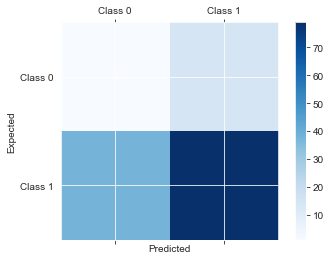

In [126]:
conf_mat = (confusion_matrix(y_test,predictions))
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
# a confusion matrix 

In [127]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns)
features

['Age',
 'AgeWhenReceived',
 'EducationLevel',
 'NativeCounty ',
 'PreviousCrime',
 'Codefendants',
 'NumberVictim',
 'WhiteVictim',
 'HispanicVictim',
 'BlackVictim',
 'VictimOther Races',
 'FemaleVictim',
 'MaleVictim']

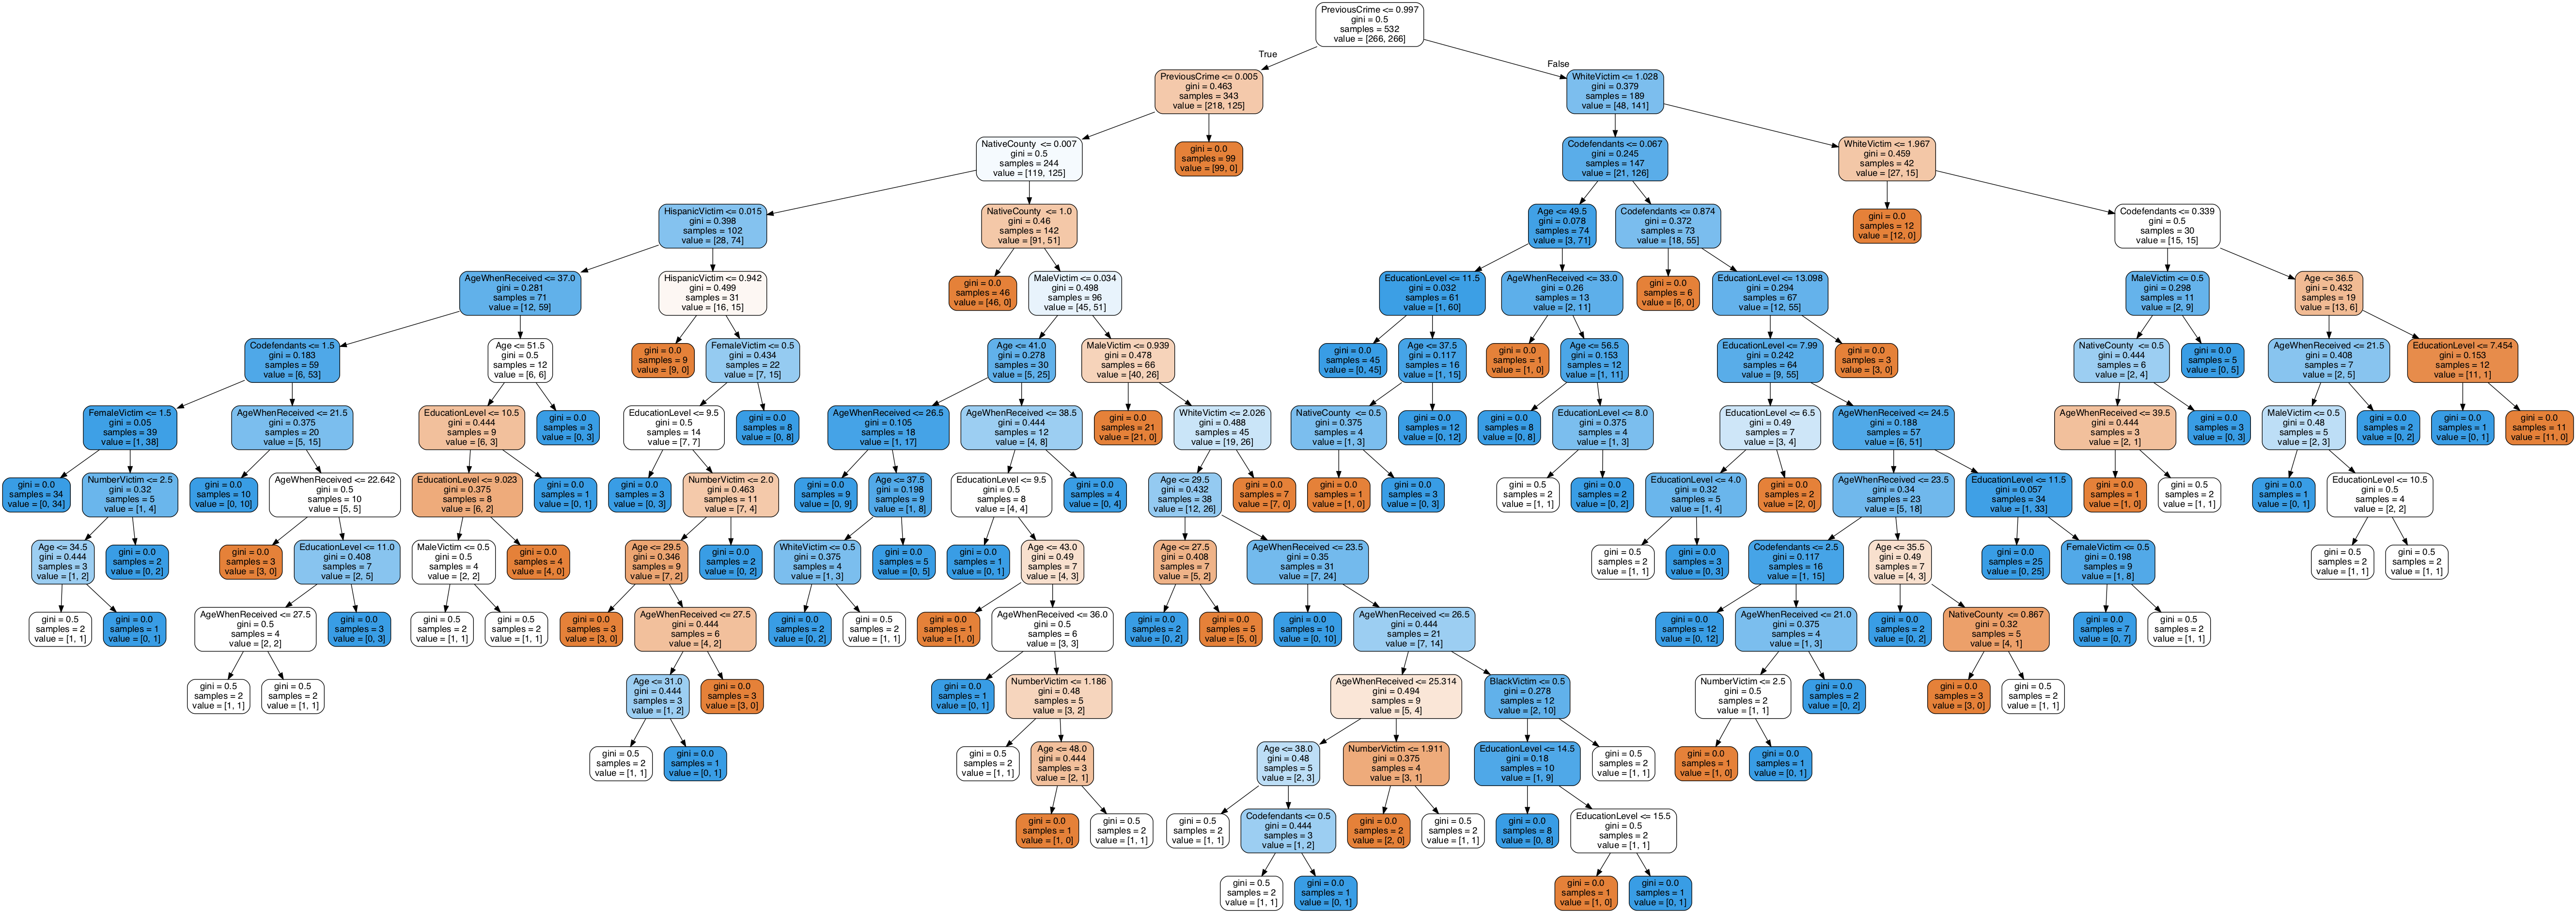

In [128]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [136]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
regTree = DecisionTreeRegressor(max_depth=5)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[-0.15142308774244306, -0.1606934473420456, -0.16626450585140176, -0.1718970283625079, -0.1795698647415718, -0.2007775230208637, -0.2170251632056123, -0.22561531132512158, -0.23754253405781375]


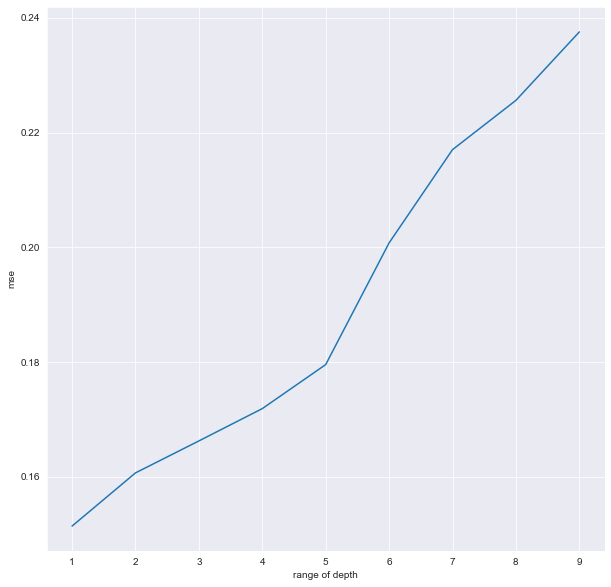

In [137]:
from sklearn.model_selection import cross_val_score
depth_range = range(1,10)
mse = []
for depth in depth_range:
    regtree = DecisionTreeRegressor(max_depth = depth)
    depth_score = cross_val_score(regtree, X, y, scoring = 'neg_mean_squared_error',cv = 6)
    mse.append(depth_score.mean())
print(mse)
mse = [abs(number) for number in mse]
plt.figure(figsize = (10,10))
plt.plot(depth_range, mse)
plt.xlabel('range of depth')
plt.ylabel('mse')
plt.show()
